## 머신러닝
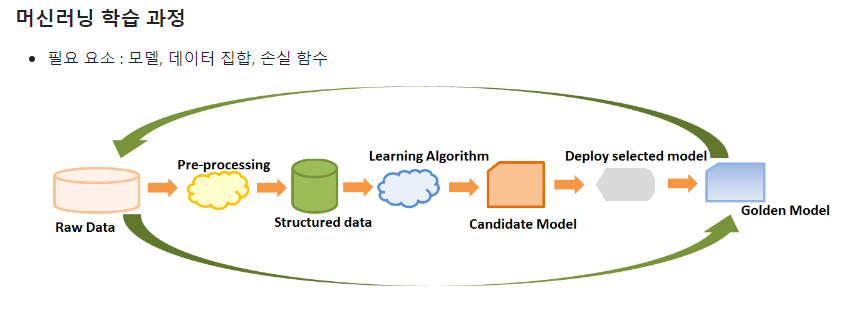

## 지도학습(Supervised Learning)
- 목표변수(Target or Y) 존재하는 학습법

In [1]:
import pandas as pd

In [2]:
df_BCD = pd.read_csv('../../datasets/BreastCancerWisconsinDataSet.csv')
df_BCD[:2] # 1.데이터 가져옴 

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  

[2 rows x 33 columns]

### 목표변수 - 연속형 설정
** 목표변수의 데이터 유형에 따라 알고리즘 방식이 달라짐. 
- df_BCD 목표변수: 'radius_mean'
- df_BCD 설명변수:  drop columns: 'radius_mean'(목표변수뺄때 주의하기_),'diagnosis'_object, 'id', 'Unnamed: 32'

In [3]:
df_BCD.info() ## 목표변수 radius_mean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df_BCD.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

#### data preprocessing

##### preprocessing_설명변수, 목표변수 추출

In [5]:
df_BCD_extract = df_BCD[['radius_mean', 'texture_mean', 'perimeter_mean']]
df_BCD_extract[:2]

radius_mean  texture_mean  perimeter_mean
0        17.99         10.38           122.8
1        20.57         17.77           132.9

#### 결측치 확인

In [6]:
df_BCD_extract.isnull().sum()

radius_mean       0
texture_mean      0
perimeter_mean    0
dtype: int64

##### strucured data 
- 목표변수, Y, **Target**
- 설명변수, X, **Label**

In [7]:
target = df_BCD_extract['radius_mean']
labels = df_BCD_extract[['texture_mean', 'perimeter_mean']]
target.shape, labels.shape

((569,), (569, 2))

##### strucured data 
- 목표변수, Y, **Target**
- 설명변수, X, **Label**

#### Learning Algorithm = 모델학습
- from sklearn.linear_model ## 선형-모델
- LinearRegression 선-회기분석: linear 선형으로 보이는(이어지는) 

In [10]:
from sklearn.linear_model import LinearRegression

#https://scikit-learn.org/stable/modules/linear_model.html

In [12]:
model = LinearRegression()
model.fit(labels,target)

LinearRegression()

##### 교육시킨당 = 학습
- model.fit() ## 백지이므로 data를 넣어줘야함. 
    - 적용: model.fit(설명변수, 목표변수)
    ⇒ data를 넣으면 관련 공식을 LinearRegression()에 담겨진다. 

#### 평가 진행. (지금은 skip (8.25))

In [16]:
target_predict = model.predict(labels)
len(target_predict)

569

In [17]:
from sklearn.metrics import r2_score
r2_score(target, target_predict)

0.9957437087622522

#### 미래예측(서비스 개시)
    - 설명변수와 목표변수를 학습 후 관련 공식이 생기면 예측을 진행한다. 
    - model.predict() : model = LinearRegression() 의 function인 predict()을 사용. 
        - model.predict(test_set) ⇒ array([17.75116355])
        - target[:1] ⇒ 0    17.99
                - 두개를 비교했을 때, model.predict(test_set)의 값과 유사하다는 것을 알 수 있음. 

In [18]:
df_BCD_extract[50:55]

radius_mean  texture_mean  perimeter_mean
50        11.76         21.60           74.72
51        13.64         16.34           87.21
52        11.94         18.24           75.71
53        18.22         18.70          120.30
54        15.10         22.02           97.26

In [19]:
# 16.34, 87.21 : 외부에서 입력한 설명변수 값들
temp_label = [[16.34, 87.21]]

In [20]:
model.predict(temp_label)

C:\Users\01-09\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.45096511])